# Classify a given silhouette as one of three types of vehicle

Data Description:
    
The data contains features extracted from the silhouette of vehicles in different angles. 

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van,
    
Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the 

expectation that the bus, van and either one of the cars would be readily distinguishable, but it 

would be more difficult to distinguish between the cars

The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features 

extracted from the silhouette. The vehicle may be viewed from one of many different angles.

Attribute Information:

All the features are geometric features extracted from the silhouette.

All are numeric in nature

Objective:
    
Apply dimensionality reduction technique – PCA 
Use ML algorithm with and without PCA
apply clustering Algorithm

In [1]:
#load  libraries

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

In [85]:
#load dataset
df=pd.read_csv("vehicle.csv")

In [86]:
df1=df.copy()

# ANALYSIS OF THE DATASET

In [87]:
df1.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [88]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [89]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


In [90]:
df1.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [91]:
df1.rename(columns= {'compactness': 'Compactness', 'circularity': 'Circularity', 'distance_circularity': 'distance circularity', 'radius_ratio':'radius ratio',
                    'pr.axis_aspect_ratio':'axis_aspect_ratio','max.length_aspect_ratio':'maxlength_aspect_ratio','scatter_ratio':'scatter ratio','elongatedness':'elongation',
                    'pr.axis_rectangularity':'axis_rectangularity','max.length_rectangularity':'maxlength_rectangularity','scaled_variance':'scaledvariance',
                     'scaled_variance.1':'scaledvariance1','scaled_radius_of_gyration':'scaled_radiusofgyration','scaled_radius_of_gyration.1':'scaled_radiusofgyration1',
                    'skewness_about':'skewness','skewness_about.1':'skewness1','skewness_about.2':'skewness_about2','hollows_ratio':'hollowsratio',
                    'class':'Class'},inplace=True)

In [92]:
df1.head()

,Compactness,Circularity,distance circularity,radius ratio,axis_aspect_ratio,maxlength_aspect_ratio,scatter ratio,elongation,axis_rectangularity,maxlength_rectangularity,scaledvariance,scaledvariance1,scaled_radiusofgyration,scaled_radiusofgyration1,skewness,skewness1,skewness_about2,hollowsratio,Class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [93]:
df1.columns

Index(['Compactness', 'Circularity', 'distance circularity', 'radius ratio',
       'axis_aspect_ratio', 'maxlength_aspect_ratio', 'scatter ratio',
       'elongation', 'axis_rectangularity', 'maxlength_rectangularity',
       'scaledvariance', 'scaledvariance1', 'scaled_radiusofgyration',
       'scaled_radiusofgyration1', 'skewness', 'skewness1', 'skewness_about2',
       'hollowsratio', 'Class'],
      dtype='object')

PLOTS

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024713309E48>,
      dtype=object)

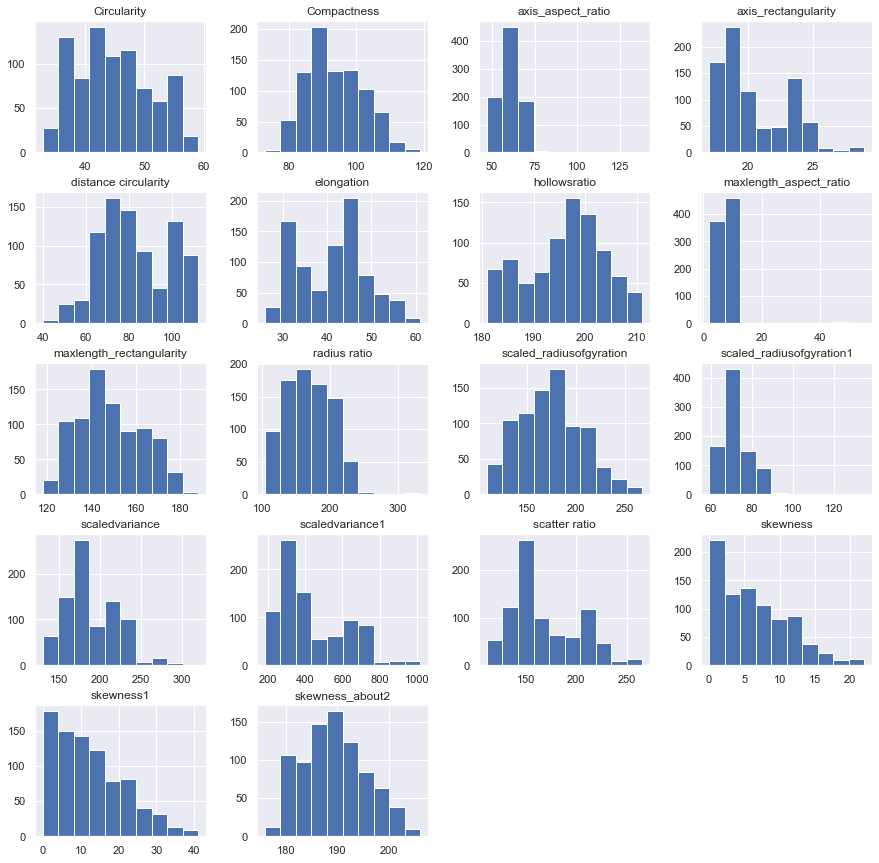

In [94]:
#1.Histogram
df1.hist(figsize=(15,15))

Analysis of Histogram:
    
    1.attributes such as maxlength_aspect_ratio,axis_aspect_ratio,axis_rectangularity,
    radius ratio,caled_radiusofgyration1,skewness,skewness1 are skewed due to outliers
    
    2.attributes such as Circularity,Compactness,elongation,scaled_radiusofgyration1,maxlength_rectangularity 
    are normally distributed visually.

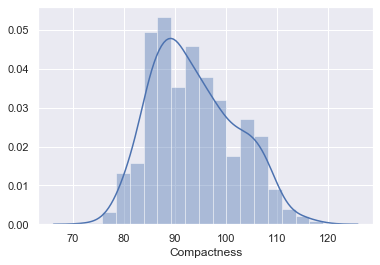

In [95]:
#2.distplots
sns.distplot(df1['Compactness'])

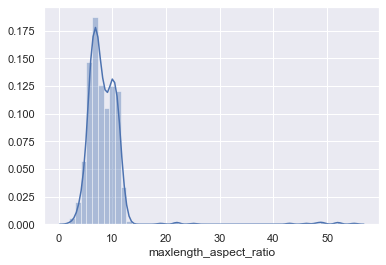

In [96]:
sns.distplot(df1['maxlength_aspect_ratio'])

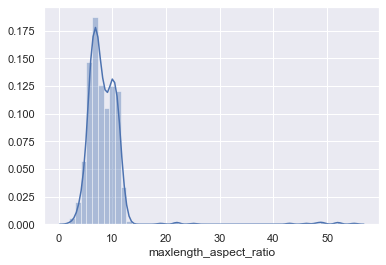

In [97]:
sns.distplot(df1['maxlength_aspect_ratio'])

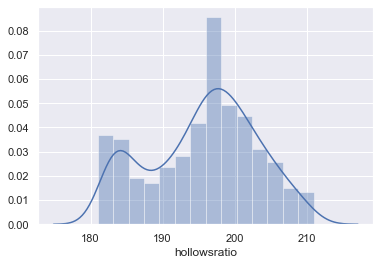

In [98]:
sns.distplot(df1['hollowsratio'])

BOXPLOTS

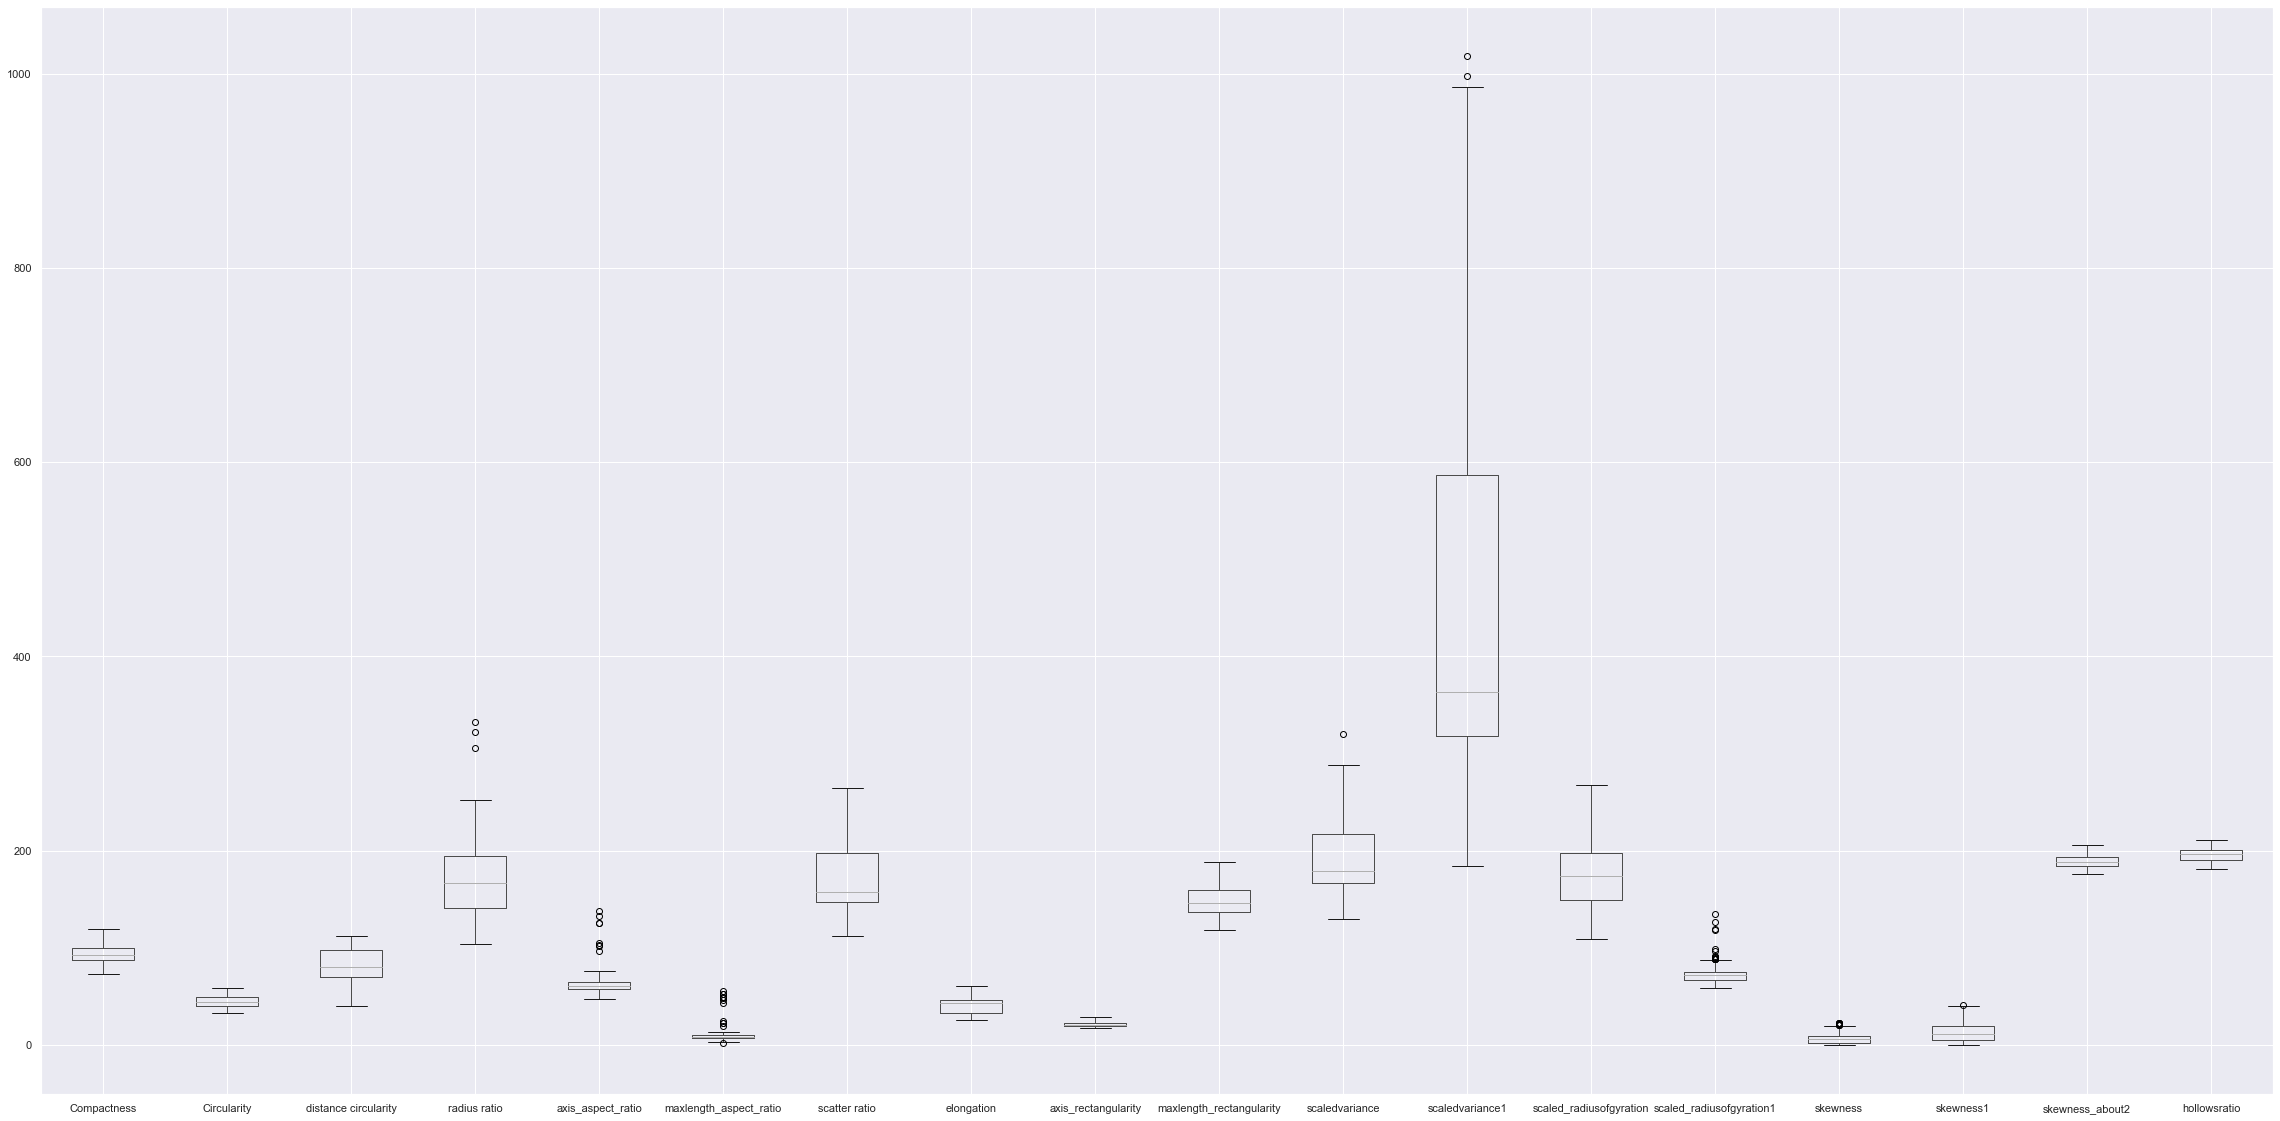

In [99]:
df1.boxplot(column=['Compactness', 'Circularity', 'distance circularity', 'radius ratio',
       'axis_aspect_ratio', 'maxlength_aspect_ratio', 'scatter ratio',
       'elongation', 'axis_rectangularity', 'maxlength_rectangularity',
       'scaledvariance', 'scaledvariance1', 'scaled_radiusofgyration',
       'scaled_radiusofgyration1', 'skewness', 'skewness1', 'skewness_about2',
       'hollowsratio'],figsize=(40,20))
#double click to view

In [100]:
corr=df1.corr()
corr

,Compactness,Circularity,distance circularity,radius ratio,axis_aspect_ratio,maxlength_aspect_ratio,scatter ratio,elongation,axis_rectangularity,maxlength_rectangularity,scaledvariance,scaledvariance1,scaled_radiusofgyration,scaled_radiusofgyration1,skewness,skewness1,skewness_about2,hollowsratio
Compactness,1.000000,0.689786,0.791707,0.691081,0.091779,0.148249,0.812770,-0.788736,0.814248,0.676143,0.764361,0.818674,0.585845,-0.250603,0.236685,0.157670,0.298528,0.365552
Circularity,0.689786,1.000000,0.797180,0.625051,0.154283,0.251407,0.858265,-0.827246,0.856603,0.965729,0.806791,0.850863,0.935950,0.053080,0.144968,-0.011869,-0.106339,0.045652
distance circularity,0.791707,0.797180,1.000000,0.771748,0.158684,0.264621,0.907949,-0.913020,0.896273,0.775149,0.865710,0.890541,0.706950,-0.227001,0.114665,0.266049,0.146027,0.333648
radius ratio,0.691081,0.625051,0.771748,1.000000,0.665363,0.450486,0.738480,-0.792946,0.712744,0.571083,0.798294,0.725598,0.541325,-0.181520,0.049112,0.174469,0.382912,0.472339
axis_aspect_ratio,0.091779,0.154283,0.158684,0.665363,1.000000,0.648861,0.103832,-0.183492,0.079566,0.127322,0.273738,0.089750,0.122454,0.152860,-0.058539,-0.032180,0.240201,0.267760
maxlength_aspect_ratio,0.148249,0.251407,0.264621,0.450486,0.648861,1.000000,0.165998,-0.180053,0.161603,0.305943,0.319033,0.143745,0.189752,0.295638,0.015446,0.043491,-0.026184,0.143919
scatter ratio,0.812770,0.858265,0.907949,0.738480,0.103832,0.165998,1.000000,-0.973504,0.992078,0.810017,0.951672,0.996328,0.800577,-0.028006,0.074376,0.213512,0.005171,0.118504
elongation,-0.788736,-0.827246,-0.913020,-0.792946,-0.183492,-0.180053,-0.973504,1.000000,-0.950405,-0.776150,-0.938313,-0.956488,-0.766671,0.103535,-0.052243,-0.186027,-0.114846,-0.216769
axis_rectangularity,0.814248,0.856603,0.896273,0.712744,0.079566,0.161603,0.992078,-0.950405,1.000000,0.813135,0.938182,0.992316,0.798522,-0.015711,0.083219,0.215200,-0.019066,0.099481
maxlength_rectangularity,0.676143,0.965729,0.775149,0.571083,0.127322,0.305943,0.810017,-0.776150,0.813135,1.000000,0.746657,0.797485,0.866554,0.041283,0.136077,0.001660,-0.104437,0.076770


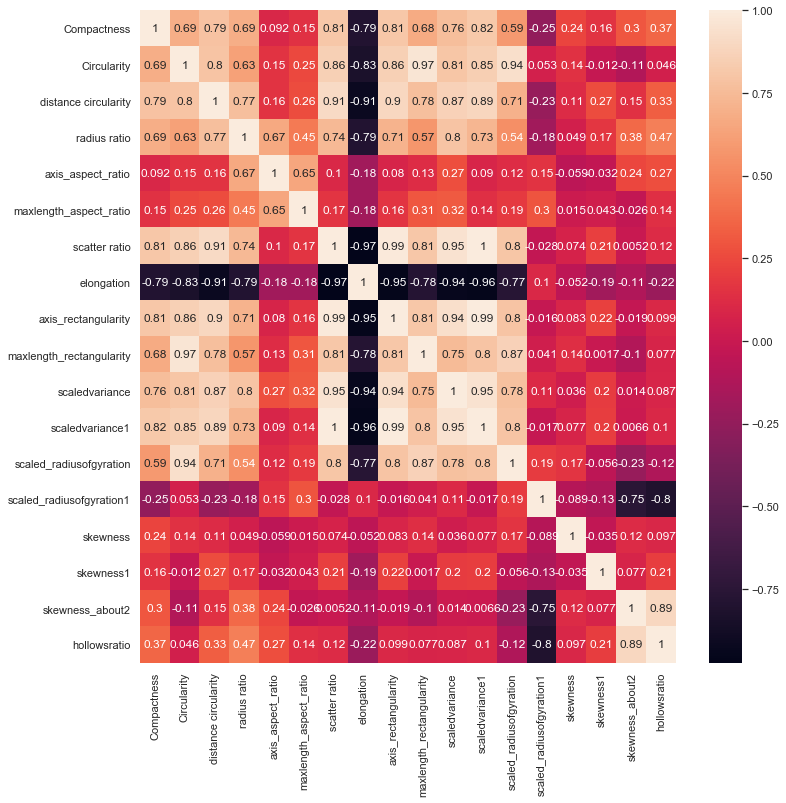

In [101]:
plt.figure(figsize=(12, 12))
sns.heatmap(corr,annot=True)

In [102]:
df1['Class'].value_counts()

car    429
bus    218
van    199
Name: Class, dtype: int64

# MISSING VALUES

In [103]:
df1.isnull().sum()

Compactness                 0
Circularity                 5
distance circularity        4
radius ratio                6
axis_aspect_ratio           2
maxlength_aspect_ratio      0
scatter ratio               1
elongation                  1
axis_rectangularity         3
maxlength_rectangularity    0
scaledvariance              3
scaledvariance1             2
scaled_radiusofgyration     2
scaled_radiusofgyration1    4
skewness                    6
skewness1                   1
skewness_about2             1
hollowsratio                0
Class                       0
dtype: int64

The number of missing values in each column is obtained by isnull()

In [104]:
for i in df1.columns[:-1]:
    median_value = df1[i].median()
    df1[i] = df1[i].fillna(median_value)

the missing values is replaced by the mean of that attribute

In [105]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Compactness               846 non-null    int64  
 1   Circularity               846 non-null    float64
 2   distance circularity      846 non-null    float64
 3   radius ratio              846 non-null    float64
 4   axis_aspect_ratio         846 non-null    float64
 5   maxlength_aspect_ratio    846 non-null    int64  
 6   scatter ratio             846 non-null    float64
 7   elongation                846 non-null    float64
 8   axis_rectangularity       846 non-null    float64
 9   maxlength_rectangularity  846 non-null    int64  
 10  scaledvariance            846 non-null    float64
 11  scaledvariance1           846 non-null    float64
 12  scaled_radiusofgyration   846 non-null    float64
 13  scaled_radiusofgyration1  846 non-null    float64
 14  skewness  

In [106]:
df1.isnull().sum()

Compactness                 0
Circularity                 0
distance circularity        0
radius ratio                0
axis_aspect_ratio           0
maxlength_aspect_ratio      0
scatter ratio               0
elongation                  0
axis_rectangularity         0
maxlength_rectangularity    0
scaledvariance              0
scaledvariance1             0
scaled_radiusofgyration     0
scaled_radiusofgyration1    0
skewness                    0
skewness1                   0
skewness_about2             0
hollowsratio                0
Class                       0
dtype: int64

Now there are no missing values , all are replaced by mean values

In [107]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.00,119.0
Circularity,846.0,44.823877,6.134272,33.0,40.00,44.0,49.00,59.0
distance circularity,846.0,82.100473,15.741569,40.0,70.00,80.0,98.00,112.0
radius ratio,846.0,168.874704,33.401356,104.0,141.00,167.0,195.00,333.0
axis_aspect_ratio,846.0,61.677305,7.882188,47.0,57.00,61.0,65.00,138.0
maxlength_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.00,55.0
scatter ratio,846.0,168.887707,33.197710,112.0,147.00,157.0,198.00,265.0
elongation,846.0,40.936170,7.811882,26.0,33.00,43.0,46.00,61.0
axis_rectangularity,846.0,20.580378,2.588558,17.0,19.00,20.0,23.00,29.0
maxlength_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.00,188.0


In [108]:
df1.head()

,Compactness,Circularity,distance circularity,radius ratio,axis_aspect_ratio,maxlength_aspect_ratio,scatter ratio,elongation,axis_rectangularity,maxlength_rectangularity,scaledvariance,scaledvariance1,scaled_radiusofgyration,scaled_radiusofgyration1,skewness,skewness1,skewness_about2,hollowsratio,Class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [109]:
df1.shape

(846, 19)

# OUTLIERS

OUTLIER DETECTION AND REPLACE 

from the box plots we infer Outliers are present in the below coloumns

col 4: radius ratio

col 5: axis_aspect_ratio

col 6: maxlength_aspect_ratio

col 11: scaledvariance

col 12: scaledvariance1

col 14: scaled_radiusofgyration1

col 15: skewness

col 16: skewness1

in the dataset Outliers can be treated by removing outliers or replacing outliers with  median or value equal to outer quartile range

In [110]:
from numpy import percentile

In [111]:
q25, q75 = percentile(df1['radius ratio'], 25), percentile(df1['radius ratio'], 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
print('outlier cutoff:', cut_off)
lower, upper = q25 - cut_off, q75 + cut_off
outliers= [x for x in df1['radius ratio'] if x < lower or x > upper]
print('Outliers:',outliers)
a=df1['radius ratio'].median()
df1['radius ratio'].replace(outliers,a,inplace=True)

Percentiles: 25th=141.000, 75th=195.000, IQR=54.000
outlier cutoff: 81.0
Outliers: [306.0, 322.0, 333.0]


In [112]:
a25, a75 = percentile(df1['axis_aspect_ratio'], 25), percentile(df1['axis_aspect_ratio'], 75)
iqr1 = a75 - a25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (a25, a75, iqr1))
# calculate the outlier cutoff
cut_off1 = iqr1 * 1.5
print('outlier cutoff:', cut_off1)
lower1, upper1 = a25 - cut_off1, a75 + cut_off1
a_outliers= [x for x in df1['axis_aspect_ratio'] if x < lower1 or x > upper1]
print('Outliers:',a_outliers)
b=df1['axis_aspect_ratio'].median()
df1['axis_aspect_ratio'].replace(a_outliers,b,inplace=True)

Percentiles: 25th=57.000, 75th=65.000, IQR=8.000
outlier cutoff: 12.0
Outliers: [103.0, 126.0, 126.0, 133.0, 102.0, 138.0, 97.0, 105.0]


In [113]:
b25, b75 = percentile(df1['maxlength_aspect_ratio'], 25), percentile(df1['maxlength_aspect_ratio'], 75)
iqr2 = b75 - b25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (b25, b75, iqr2))
# calculate the outlier cutoff
cut_off2 = iqr2 * 1.5
print('outlier cutoff:', cut_off2)
lower2, upper2 = b25 - cut_off2, b75 + cut_off2
b_outliers= [x for x in df1['maxlength_aspect_ratio'] if x < lower2 or x > upper2]
print('Outliers:',b_outliers)
c=df1['maxlength_aspect_ratio'].median()
df1['maxlength_aspect_ratio'].replace(b_outliers,c,inplace=True)

Percentiles: 25th=7.000, 75th=10.000, IQR=3.000
outlier cutoff: 4.5
Outliers: [52, 49, 52, 22, 48, 43, 49, 25, 46, 19, 2, 55, 22]


In [114]:
c25, c75 = percentile(df1['scaledvariance'], 25), percentile(df1['scaledvariance'], 75)
iqr3 = c75 - c25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (c25, c75, iqr3))
# calculate the outlier cutoff
cut_off3 = iqr3 * 1.5
print('outlier cutoff:', cut_off3)
lower3, upper3 = c25 - cut_off3, c75 + cut_off3
c_outliers= [x for x in df1['scaledvariance'] if x < lower3 or x > upper3]
print('Outliers:',c_outliers)
d=df1['scaledvariance'].median()
df1['scaledvariance'].replace(c_outliers,d,inplace=True)

Percentiles: 25th=167.000, 75th=217.000, IQR=50.000
outlier cutoff: 75.0
Outliers: [320.0]


In [115]:
d25, d75 = percentile(df1['scaledvariance1'], 25), percentile(df1['scaledvariance1'], 75)
iqr4 = d75 - d25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (d25, d75, iqr4))
# calculate the outlier cutoff
cut_off4 = iqr4 * 1.5
print('outlier cutoff:', cut_off4)
lower4, upper4 = d25 - cut_off4, d75 + cut_off4
d_outliers= [x for x in df1['scaledvariance1'] if x < lower4 or x > upper4]
print('Outliers:',d_outliers)
e=df1['scaledvariance1'].median()
df1['scaledvariance1'].replace(d_outliers,e,inplace=True)

Percentiles: 25th=318.250, 75th=586.750, IQR=268.500
outlier cutoff: 402.75
Outliers: [998.0, 1018.0]


In [116]:
e25, e75 = percentile(df1['skewness'], 25), percentile(df1['skewness'], 75)
iqr5 = e75 - e25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (e25, e75, iqr5))
# calculate the outlier cutoff
cut_off5 = iqr5 * 1.5
print('outlier cutoff:', cut_off5)
lower5, upper5 = e25 - cut_off5, e75 + cut_off5
e_outliers= [x for x in df1['skewness'] if x < lower5 or x > upper5]
print('Outliers:',e_outliers)
f=df1['skewness'].median()
df1['skewness'].replace(e_outliers,f,inplace=True)

Percentiles: 25th=2.000, 75th=9.000, IQR=7.000
outlier cutoff: 10.5
Outliers: [20.0, 21.0, 22.0, 20.0, 21.0, 21.0, 21.0, 22.0, 22.0, 22.0, 20.0, 21.0]


In [117]:
f25, f75 = percentile(df1['skewness1'], 25), percentile(df1['skewness1'], 75)
iqr6 = f75 - f25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (f25, f75, iqr6))
# calculate the outlier cutoff
cut_off6 = iqr6 * 1.5
print('outlier cutoff:', cut_off6)
lower6, upper6 = f25 - cut_off6, f75 + cut_off6
f_outliers= [x for x in df1['skewness1'] if x < lower6 or x > upper6]
print('Outliers:',f_outliers)
g=df1['skewness1'].median()
df1['skewness1'].replace(f_outliers,g,inplace=True)

Percentiles: 25th=5.000, 75th=19.000, IQR=14.000
outlier cutoff: 21.0
Outliers: [41.0]


In [118]:
g25, g75 = percentile(df1['scaled_radiusofgyration1'], 25), percentile(df1['scaled_radiusofgyration1'], 75)
iqr7 = g75 - g25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (g25, g75, iqr6))
# calculate the outlier cutoff
cut_off7 = iqr7 * 1.5
print('outlier cutoff:', cut_off7)
lower7, upper7 = g25 - cut_off7, g75 + cut_off7
h_outliers= [x for x in df1['scaled_radiusofgyration1'] if x < lower7 or x > upper7]
print('Outliers:',h_outliers)
h=df1['scaled_radiusofgyration1'].median()
df1['scaled_radiusofgyration1'].replace(h_outliers,h,inplace=True)

Percentiles: 25th=67.000, 75th=75.000, IQR=14.000
outlier cutoff: 12.0
Outliers: [127.0, 118.0, 88.0, 88.0, 119.0, 97.0, 89.0, 90.0, 88.0, 135.0, 88.0, 91.0, 90.0, 99.0, 88.0]


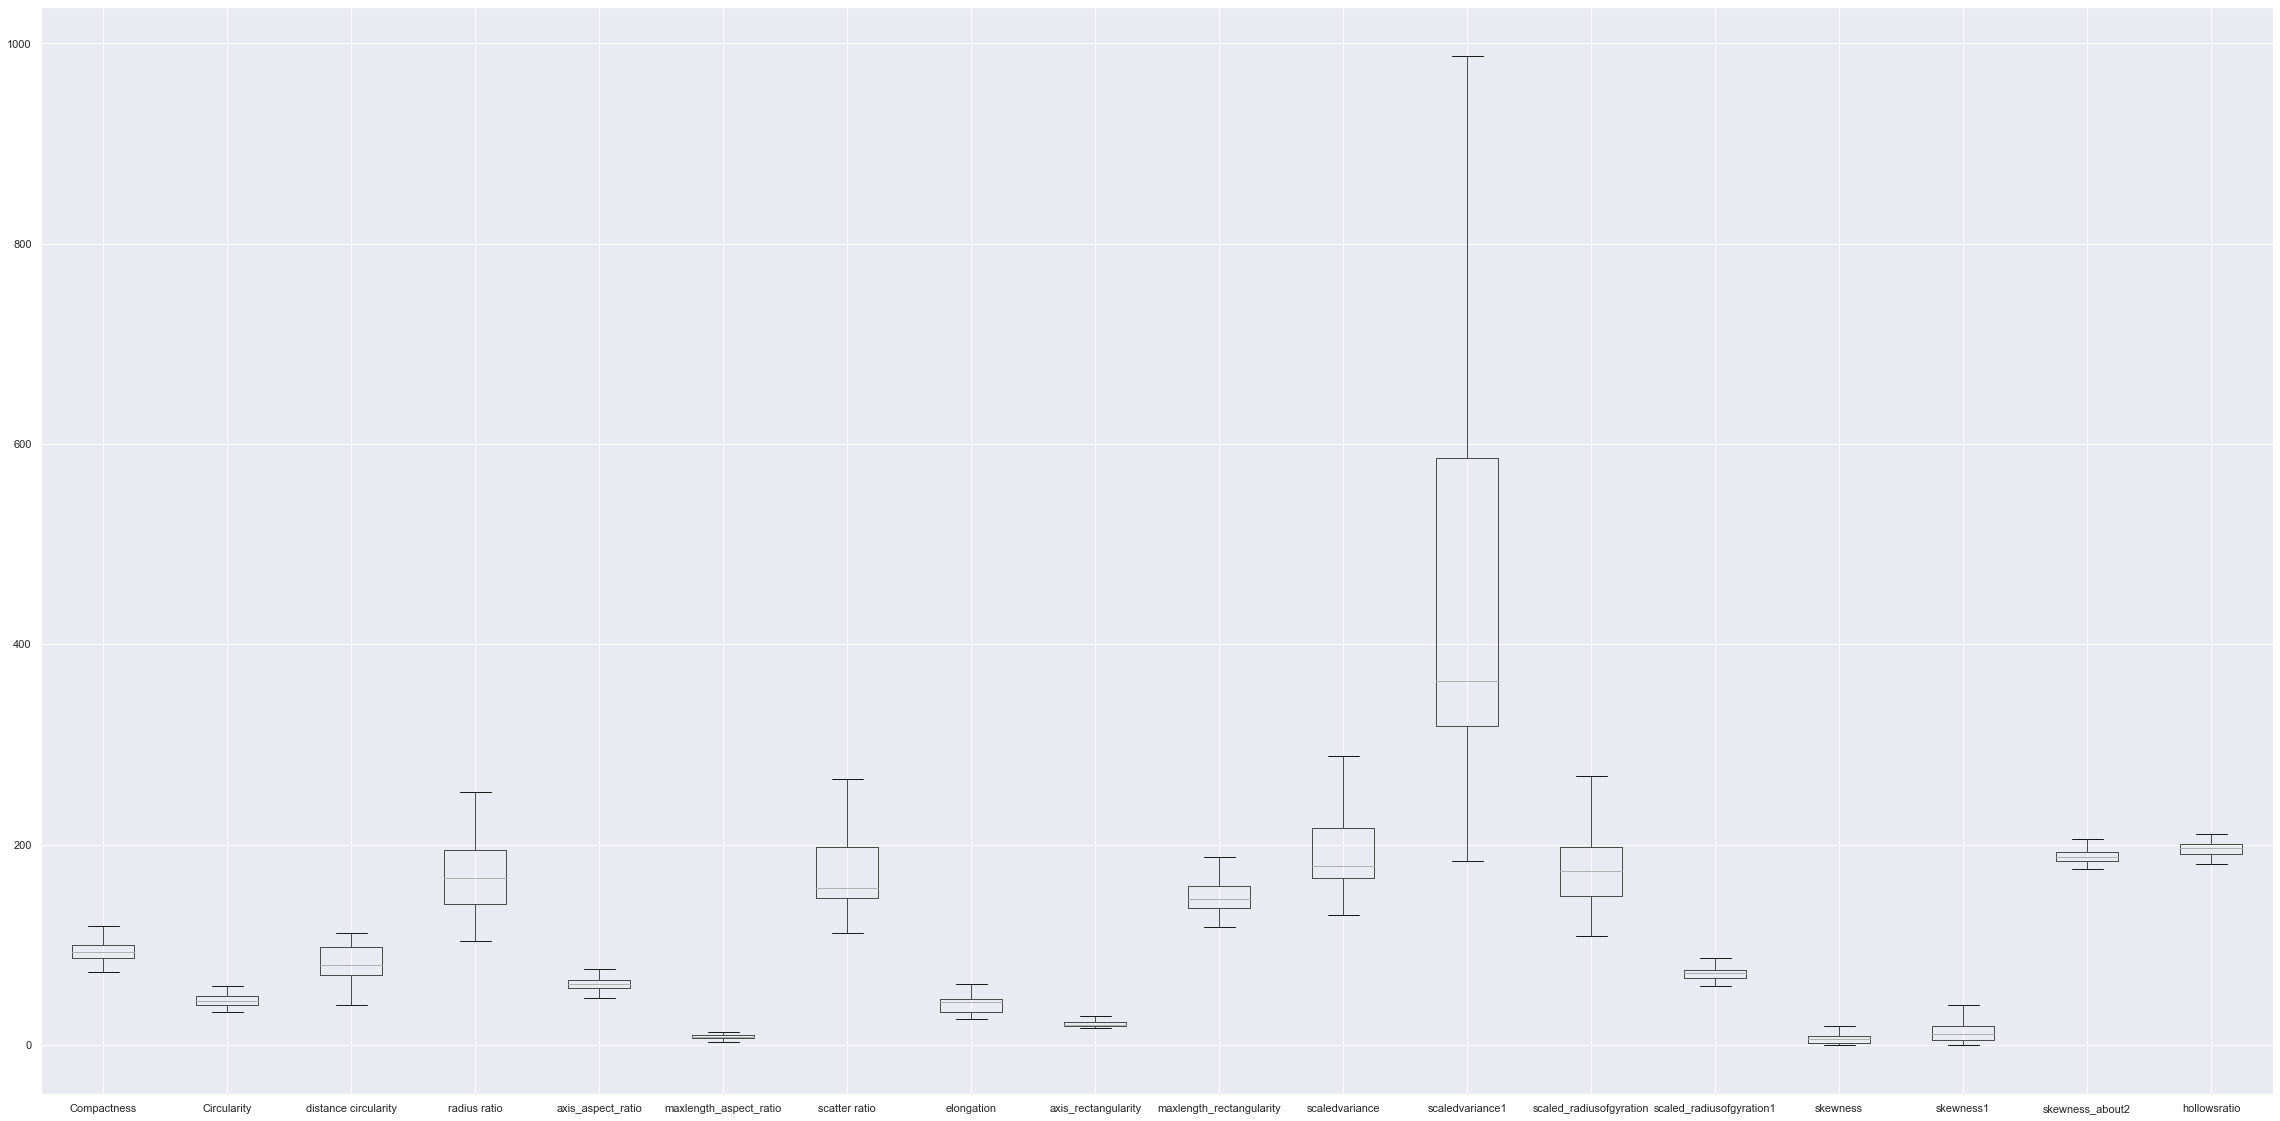

In [119]:
df1.boxplot(column=['Compactness', 'Circularity', 'distance circularity', 'radius ratio',
       'axis_aspect_ratio', 'maxlength_aspect_ratio', 'scatter ratio',
       'elongation', 'axis_rectangularity', 'maxlength_rectangularity',
       'scaledvariance', 'scaledvariance1', 'scaled_radiusofgyration',
       'scaled_radiusofgyration1', 'skewness', 'skewness1', 'skewness_about2',
       'hollowsratio'],figsize=(40,20))

THE class attribute is CATEGORICAL hence it is converted to Numerical

In [120]:
X=df1.drop('Class',axis=1) ## All independent attributes  except class 

In [121]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['Class'] = le.fit_transform(df1['Class'])
Y=df1['Class'] # only Class column

In [122]:
df1['Class'].value_counts()

1    429
0    218
2    199
Name: Class, dtype: int64

1: car 0: bus 2: van 

TEST_TRAIN_SPLIT

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25, random_state = 10)

In [125]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(634, 18)
(212, 18)
(634,)
(212,)


SCALING

Certain attributes attributes might have higher numerical values when compared to other hence
scaling is applied to bring all attributes to same magnitude for calculation

Scaling is also necessary before using Principal component analysis

In [126]:
from scipy.stats import zscore

In [127]:
Xtrain_scaled=X_train.apply(zscore)
Xtest_scaled=X_test.apply(zscore)

PCA: Principle component analysis 

PCA technique is used to reduce the dimensionality of a data set consisting of many variables correlated with each other 
such that the 1st principal component retains maximum variation that was present in the original components.

In [128]:
from sklearn.decomposition import PCA

In [129]:
pcomp=PCA(0.95)# 95% variance to be covered

In [130]:
pcomp.fit(Xtrain_scaled)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [131]:
pcomp.n_components_

7

In [132]:
pcomp.explained_variance_ratio_

array([0.54593421, 0.18449011, 0.0643917 , 0.06274369, 0.04806746,
       0.03616889, 0.01806132])

1st principal component has 54% variance , 2nd one has 16% and so on until 8th component

In [133]:
np.cumsum(pcomp.explained_variance_ratio_)

array([0.54593421, 0.73042433, 0.79481603, 0.85755972, 0.90562718,
       0.94179607, 0.95985738])

1st and 2nd principal components covers 71 % variance,
1st ,2nd,3rd and 4th principal components adds up to 80% variance 

In [134]:
Xtrain_pca=pcomp.transform(Xtrain_scaled)
Xtest_pca=pcomp.transform(Xtest_scaled)

Model is trained using Principal component transformed train and test set

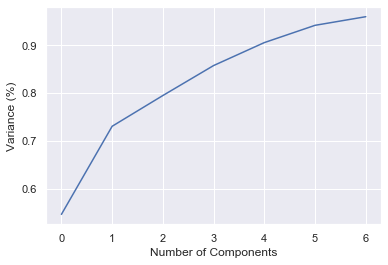

In [135]:
plt.figure()
plt.plot(np.cumsum(pcomp.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.show()

elbow plot also signifies that first principal component has 50 % variance captured and first two principal component amounts 
to 70% variance

SVM

In [136]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix

In [137]:
from sklearn.metrics import classification_report

SVM with PCA

In [138]:
pcasvm = SVC()#default kernel used is RBF
pcasvm.fit(Xtrain_pca,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [139]:
model_score=pcasvm.score(Xtrain_pca,y_train)
print('train score: ',model_score)

train score:  0.9400630914826499


In [140]:
y_predict=pcasvm.predict(Xtest_pca)
model_score1=pcasvm.score(Xtest_pca,y_test)
print('test score ', model_score1)

test score  0.910377358490566


In [141]:
print('accuracy_score', accuracy_score(y_test,y_predict))

accuracy_score 0.910377358490566


In [142]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96        58
           1       0.93      0.89      0.91       108
           2       0.81      0.91      0.86        46

    accuracy                           0.91       212
   macro avg       0.90      0.92      0.91       212
weighted avg       0.91      0.91      0.91       212



SVM without PCA

In [143]:
svcmodel = SVC()
svcmodel.fit(Xtrain_scaled, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [144]:
modelscore=svcmodel.score(Xtrain_scaled,y_train)
print('train score:',modelscore)

train score: 0.9700315457413249


In [145]:
y_predict1=svcmodel.predict(Xtest_scaled)
modelscore1=svcmodel.score(Xtest_scaled,y_test)
print('test score',modelscore1)
print('accuracy_score',accuracy_score(y_test,y_predict1))

test score 0.9528301886792453
accuracy_score 0.9528301886792453


In [151]:
print(classification_report(y_test,y_predict1))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        58
           1       0.97      0.94      0.96       108
           2       0.88      0.93      0.91        46

    accuracy                           0.95       212
   macro avg       0.94      0.95      0.95       212
weighted avg       0.95      0.95      0.95       212



# Clustering Algorithm : Kmeans

In [146]:
from sklearn.cluster import KMeans

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

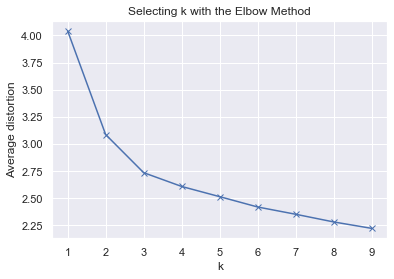

In [147]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(Xtrain_scaled)
    prediction=model.predict(Xtrain_scaled)
    meanDistortions.append(sum(np.min(cdist(Xtrain_scaled, model.cluster_centers_, 'euclidean'), axis=1)) /Xtrain_scaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [148]:
final_model=KMeans(3)
final_model.fit(Xtest_scaled)
prediction=final_model.predict(Xtest_scaled)

In [149]:
#Append the prediction 

Xtest_scaled["GROUP"] = prediction
print("Groups Assigned : \n")
Xtest_scaled.head(10)

Groups Assigned : 



,Compactness,Circularity,distance circularity,radius ratio,axis_aspect_ratio,maxlength_aspect_ratio,scatter ratio,elongation,axis_rectangularity,maxlength_rectangularity,scaledvariance,scaledvariance1,scaled_radiusofgyration,scaled_radiusofgyration1,skewness,skewness1,skewness_about2,hollowsratio,GROUP
565,0.899091,0.515202,0.151187,0.719370,-0.174526,1.412170,0.141230,-0.324473,0.115405,0.347182,0.074120,0.077008,0.381849,-1.665841,-0.093214,0.975660,1.304728,1.943642,1
354,0.519143,0.835974,0.468530,0.751235,0.359121,0.436991,0.201112,-0.451859,0.115405,0.483736,0.170918,0.157614,0.688484,-1.165381,1.111751,-1.256425,0.660343,0.734884,0
827,0.645792,1.958675,1.103217,0.273258,-1.241821,2.387349,1.608333,-1.343560,1.644528,2.736878,1.074365,1.620045,1.179102,0.002361,-0.334207,-0.618687,-0.628428,0.331965,0
636,0.265844,-0.607499,-0.864311,-0.491504,-0.886056,-0.538188,-0.876759,0.821999,-1.031436,-0.472142,-0.893858,-0.849966,-0.170096,-1.832662,1.352744,-0.512397,2.110210,1.809335,1
418,-0.874000,-0.286728,-0.800843,0.018337,1.960063,-0.538188,-0.547409,0.439842,-0.649156,-0.199034,-0.409869,-0.596631,-0.108769,0.669641,0.147779,-0.087238,-0.789524,-1.145406,2
567,-0.367402,-0.767885,0.024250,-0.077258,-0.174526,-0.050599,-0.307882,0.057684,-0.266875,-1.018358,-0.022677,-0.354812,-0.599386,0.002361,-0.093214,-0.618687,-0.467331,-0.608180,2
43,-0.114104,-1.249043,-0.420031,0.464449,0.359121,-0.050599,-0.188119,-0.069702,-0.266875,-0.950081,0.041854,-0.228145,-1.090004,-0.831740,-0.334207,-0.618687,0.499247,0.197658,1
131,-1.000649,-1.409429,-0.356562,-0.109123,-0.174526,-0.538188,-0.607291,0.567227,-0.649156,-1.359743,-0.506667,-0.654207,-1.335313,-0.998561,-1.298180,2.038558,1.143632,1.003497,1
743,0.519143,0.515202,1.166686,1.101751,0.714886,0.436991,0.799929,-0.961402,0.879967,0.278905,0.848503,0.802466,-0.016778,-0.664920,-0.816194,-0.831266,0.015958,0.197658,0
218,-1.380597,-0.126342,-0.927780,-0.778290,0.003356,-0.050599,-0.697114,0.567227,-0.649156,-0.335588,-0.635731,-0.688753,0.167203,0.336001,-1.057187,-1.256425,-0.628428,-0.608180,2


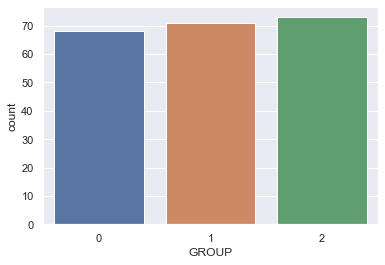

In [150]:
sns.countplot(x='GROUP',data=Xtest_scaled)

# Clustering Algorithm: Hierarchial clustering.

In [152]:
from sklearn.cluster import AgglomerativeClustering

In [153]:
Hmodel = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')

In [154]:
Hmodel.fit(Xtest_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3)

In [156]:
Xtest_scaled['labels'] = Hmodel.labels_

In [157]:
Xtest_scaled.head(10)

,Compactness,Circularity,distance circularity,radius ratio,axis_aspect_ratio,maxlength_aspect_ratio,scatter ratio,elongation,axis_rectangularity,maxlength_rectangularity,scaledvariance,scaledvariance1,scaled_radiusofgyration,scaled_radiusofgyration1,skewness,skewness1,skewness_about2,hollowsratio,GROUP,labels
565,0.899091,0.515202,0.151187,0.719370,-0.174526,1.412170,0.141230,-0.324473,0.115405,0.347182,0.074120,0.077008,0.381849,-1.665841,-0.093214,0.975660,1.304728,1.943642,1,2
354,0.519143,0.835974,0.468530,0.751235,0.359121,0.436991,0.201112,-0.451859,0.115405,0.483736,0.170918,0.157614,0.688484,-1.165381,1.111751,-1.256425,0.660343,0.734884,0,2
827,0.645792,1.958675,1.103217,0.273258,-1.241821,2.387349,1.608333,-1.343560,1.644528,2.736878,1.074365,1.620045,1.179102,0.002361,-0.334207,-0.618687,-0.628428,0.331965,0,1
636,0.265844,-0.607499,-0.864311,-0.491504,-0.886056,-0.538188,-0.876759,0.821999,-1.031436,-0.472142,-0.893858,-0.849966,-0.170096,-1.832662,1.352744,-0.512397,2.110210,1.809335,1,2
418,-0.874000,-0.286728,-0.800843,0.018337,1.960063,-0.538188,-0.547409,0.439842,-0.649156,-0.199034,-0.409869,-0.596631,-0.108769,0.669641,0.147779,-0.087238,-0.789524,-1.145406,2,0
567,-0.367402,-0.767885,0.024250,-0.077258,-0.174526,-0.050599,-0.307882,0.057684,-0.266875,-1.018358,-0.022677,-0.354812,-0.599386,0.002361,-0.093214,-0.618687,-0.467331,-0.608180,2,2
43,-0.114104,-1.249043,-0.420031,0.464449,0.359121,-0.050599,-0.188119,-0.069702,-0.266875,-0.950081,0.041854,-0.228145,-1.090004,-0.831740,-0.334207,-0.618687,0.499247,0.197658,1,2
131,-1.000649,-1.409429,-0.356562,-0.109123,-0.174526,-0.538188,-0.607291,0.567227,-0.649156,-1.359743,-0.506667,-0.654207,-1.335313,-0.998561,-1.298180,2.038558,1.143632,1.003497,1,2
743,0.519143,0.515202,1.166686,1.101751,0.714886,0.436991,0.799929,-0.961402,0.879967,0.278905,0.848503,0.802466,-0.016778,-0.664920,-0.816194,-0.831266,0.015958,0.197658,0,1
218,-1.380597,-0.126342,-0.927780,-0.778290,0.003356,-0.050599,-0.697114,0.567227,-0.649156,-0.335588,-0.635731,-0.688753,0.167203,0.336001,-1.057187,-1.256425,-0.628428,-0.608180,2,0


In [158]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [159]:
from scipy.spatial.distance import pdist

In [160]:
Z = linkage(Xtest_scaled, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(Xtest_scaled))

In [164]:
c # cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

0.7294653381378818

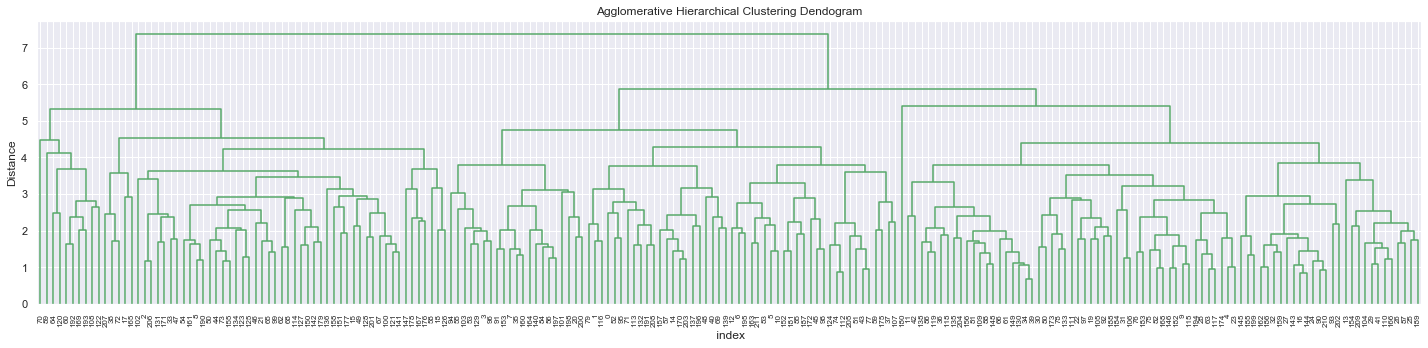

In [163]:
plt.figure(figsize=(20, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel(' index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

INFERENCE:
    
    ->Accuracy score of SVM model by using PCA is 91% while accuracy score without using PCA is 95%
    ->Hence we can achieve more than 90% accuracy by reducing the dimensions by Using PCA compared to using all the 
    dimensions in the dataset without using PCA
    -> Recall of 90% is possible by using PCA which reduces the dimensionality of the data hence conserves more time in running
    large datasets
    -> difference between train and test is very less hence its not an overfit model.
    -> by using K means unsupervised algorithm, able to group the attributes into clusters with similar data
    